In [1]:
# Import necessary libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
# Function to load and display basic information about the WAV file
def load_wav_file(file_path):
    # Load audio file using librosa
    audio_data, sample_rate = librosa.load(file_path, sr=None)  # sr=None ensures original sample rate is used
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Audio duration: {librosa.get_duration(y=audio_data, sr=sample_rate)} seconds")
    print(f"Number of samples: {len(audio_data)}")
    
    return audio_data, sample_rate

In [3]:
# Function to plot waveform
def plot_waveform(audio_data, sample_rate):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [4]:
# Function to plot spectrogram
def plot_spectrogram(audio_data, sample_rate):
    X = librosa.stft(audio_data)  # Perform Short-Time Fourier Transform (STFT)
    X_db = librosa.amplitude_to_db(abs(X))  # Convert the amplitude to decibels
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(X_db, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [5]:
# Function to analyze basic audio features
def analyze_audio_features(audio_data, sample_rate):
    # Calculate Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(audio_data)
    print(f"Mean Zero-Crossing Rate: {np.mean(zcr)}")

    # Calculate Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
    print(f"Mean Spectral Centroid: {np.mean(spectral_centroid)} Hz")

    # Calculate Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate)
    print(f"Mean Spectral Bandwidth: {np.mean(spectral_bandwidth)} Hz")

    # Calculate RMS (Root Mean Square) Energy
    rms = librosa.feature.rms(y=audio_data)
    print(f"Mean RMS Energy: {np.mean(rms)}")

In [22]:
# Example usage
import os
file_path = os.path.join("dataset","LiamsOffice","session_005","time_1725023284","audio","BOTTOM_LEFT.wav")
audio_data, sample_rate = load_wav_file(file_path)

Sample rate: 48000 Hz
Audio duration: 22.832 seconds
Number of samples: 1095936


0.057769775


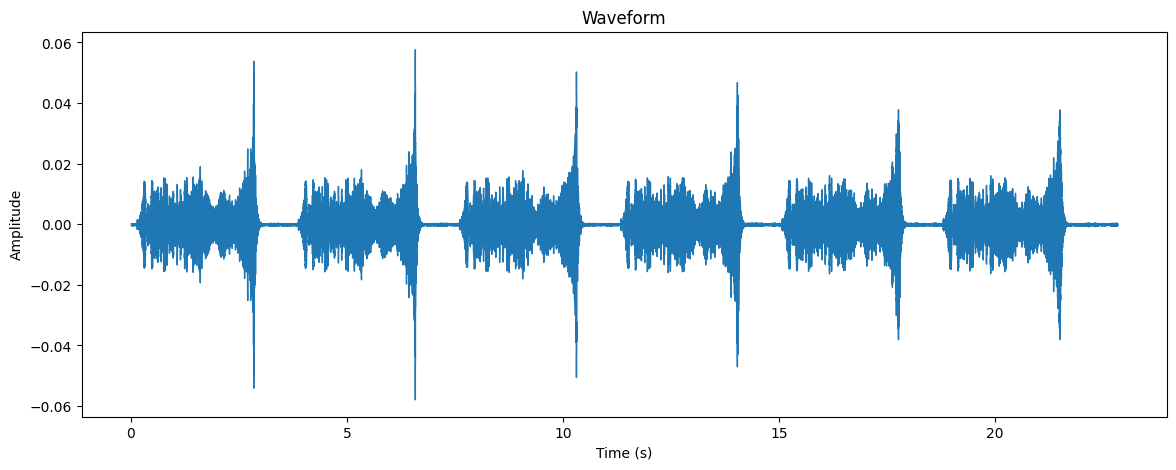

In [23]:
print(audio_data.max())
plot_waveform(audio_data, sample_rate)


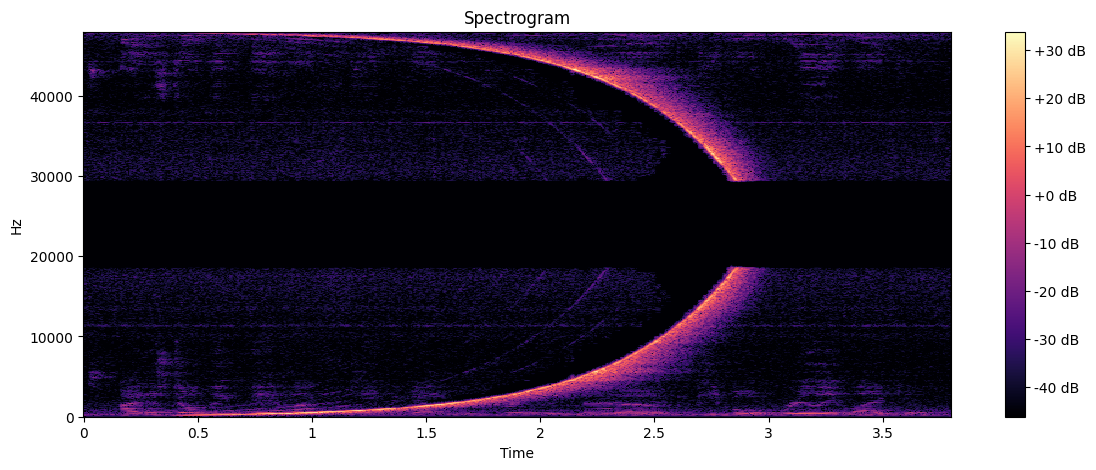

In [13]:
plot_spectrogram(audio_data, sample_rate)

In [21]:
analyze_audio_features(audio_data, sample_rate)

Mean Zero-Crossing Rate: 0.252996115664446
Mean Spectral Centroid: 8864.083430896017 Hz
Mean Spectral Bandwidth: 8631.693372232856 Hz
Mean RMS Energy: 0.011468092910945415
